<a href="https://colab.research.google.com/github/jdeversdev/Data-Analytics-WGU/blob/master/D208_TASK2_JD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I: Research Question

**A1.** Does the marital status of a patient significantly predict whether they will be readmitted to the hospital?



---



**A2.**

The objectives of the data analysis are to:
1. Evaluate the significance of marital status in predicting hospital readmission.
2. Construct a logistic regression model for predictive analysis.
3. Offer insights into the association between marital status and hospital readmission.
4. Facilitate informed decision-making within the project parameters.

# Part II: Method Justification

**B1.**

The Logistic regression assumptions are the following:

1. **Binary Outcome:** Dependent variable has two categories such as yes/no.
2. **Independence:** Observations are independent; one observation does not influence another.
3. **Linearity:** Relationship between independent variables and log odds of the dependent variable is linear.
4. **No Multicollinearity:** Independent variables are not highly correlated; they provide unique information.



---



**B2.**

1. Python provides specialized tools for every stage of data analysis, from data cleaning to machine learning.

2. Python's compatibility with other technologies streamlines data processing, making analysis efficient and scalable.



---

**B3.** Logistic regression is chosen due to its suitability for analyzing binary outcomes, aligning with the prediction of hospital readmission (yes/no) based on marital status. Furthermore, it facilitates the interpretation of results and enables the assessment of the statistical significance of the association.



# Part III: Data Preparation

**C1.**

Certainly:

Data Cleaning Goals:
1. **Handling Missing Values:** Ensure that there are no missing values in the "Marital" and "ReAdmis" variables to accurately analyze their relationship.
2. **Encoding Categorical Variables:** Convert categorical variables, such as "Marital" and "ReAdmis," into numeric format for logistic regression analysis.
3. **Removing Irrelevant Variables:** Exclude any variables that are not relevant to the analysis, focusing only on those directly related to marital status and hospital readmission.

Steps Used to Clean the Data:
1. **Identify Missing Values:** Use descriptive statistics to identify missing values in the "Marital" and "ReAdmis" variables.
2. **Impute or Remove Missing Values:** Depending on the extent of missing values, impute them using appropriate techniques (e.g., mean imputation) or remove the corresponding observations.
3. **Encode Categorical Variables:** Convert categorical variables like "Marital" and "ReAdmis" into binary numeric format (0 or 1) using one-hot encoding or label encoding.
4. **Check Variable Relevance:** Review all variables in the dataset and exclude any that are not directly related to marital status or hospital readmission.
5. **Validate Data Integrity:** After cleaning, perform a final check to ensure that the data is complete, accurate, and ready for analysis.


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Load the dataset

data_csv = '/content/medical_clean.csv'
data = pd.read_csv(data_csv)

# Display the first few rows of the dataset
data.head()

# Checking the shape of the dataset
data_shape = data.shape
print("Data shape:", data_shape)

# Checking data types of each column
data_types = data.dtypes
print("Data types:", data_types)

# Checking for duplicates
duplicate_count = data.duplicated().sum()
print("Duplicate count:", duplicate_count)

Data shape: (10000, 50)
Data types: CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hype

In [ ]:
# Handling Missing Values
# Identify missing values
missing_values = data[['Marital', 'ReAdmis']].isnull().sum()
print(missing_values)

Marital    0
ReAdmis    0
dtype: int64


In [ ]:
# Check data consistency
print(data['Marital'].unique())
print(data['ReAdmis'].unique())

# Check data balance
print(data['Marital'].value_counts())
print(data['ReAdmis'].value_counts())

# Check data completeness
print(data.info())

['Divorced' 'Married' 'Widowed' 'Never Married' 'Separated']
['No' 'Yes']
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64
No     6331
Yes    3669
Name: ReAdmis, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null 

In [ ]:
# Selecting relevant variables
relevant_variables = ['Marital', 'ReAdmis']

# Creating a new dataframe with only relevant variables
relevant_data = data[relevant_variables].copy()

# Displaying the first few rows of the new dataframe
print(relevant_data.head())


    Marital ReAdmis
0  Divorced      No
1   Married      No
2   Widowed      No
3   Married      No
4   Widowed      No


# **C2.**

Based on the summary statistics for the independent variables 'Marital' and 'ReAdmis':


**ReAdmis:**
- There are 6331 instances where patients were not readmitted to the hospital.
- There are 3669 instances where patients were readmitted to the hospital.

**Marital:**
- The most common marital status among patients is Widowed, with 2045 instances.
- Following that, Married and Separated are nearly equal in frequency, with 2023 and 1987 instances respectively.
- Never Married and Divorced are also close in frequency, with 1984 and 1961 instances respectively.

### Summary:
- The distribution of hospital readmission cases seems relatively balanced, with a slightly higher count of patients not being readmitted.
- Marital status varies among patients, with a notable number of patients being widowed, followed closely by married individuals. Separated, never married, and divorced individuals show relatively similar frequencies.

In [ ]:
# Summary statistics for ReAdmis
readmis_value_counts = relevant_data['ReAdmis'].value_counts()

# Summary statistics for Marital
marital_value_counts = relevant_data['Marital'].value_counts()

print("Value counts for the ReAdmis variable:")
print(readmis_value_counts)
print("\nValue counts for the Marital variable:")
print(marital_value_counts)


Value counts for the ReAdmis variable:
No     6331
Yes    3669
Name: ReAdmis, dtype: int64

Value counts for the Marital variable:
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64


# **C3. Distribution (Univariate)**


**Marital Distribution:**
- The dataset encompasses various marital statuses, including Widowed, Married, Separated, Never Married, and Divorced.
- The most common statuses are Widowed and Married, each representing over 2000 instances.
- Separated, Never Married, and Divorced categories are also present, with similar frequencies.

**Hospital Readmission:**
- Around 63.31% of patients were not readmitted, while approximately 36.69% experienced readmission.
- This indicates a significant proportion of patients face readmission, prompting further investigation into contributing factors.

In [ ]:
# Univariate Statistics for 'Marital'
highblood_stats = relevant_data['Marital'].value_counts()
print("\nUnivariate Statistics for Marital:")
print(highblood_stats)

# Univariate Statistics for 'ReAdmis'
readmis_stats = relevant_data['ReAdmis'].value_counts()
print("\nUnivariate Statistics for ReAdmis:")
print(readmis_stats)


Univariate Statistics for Marital:
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64

Univariate Statistics for ReAdmis:
No     6331
Yes    3669
Name: ReAdmis, dtype: int64


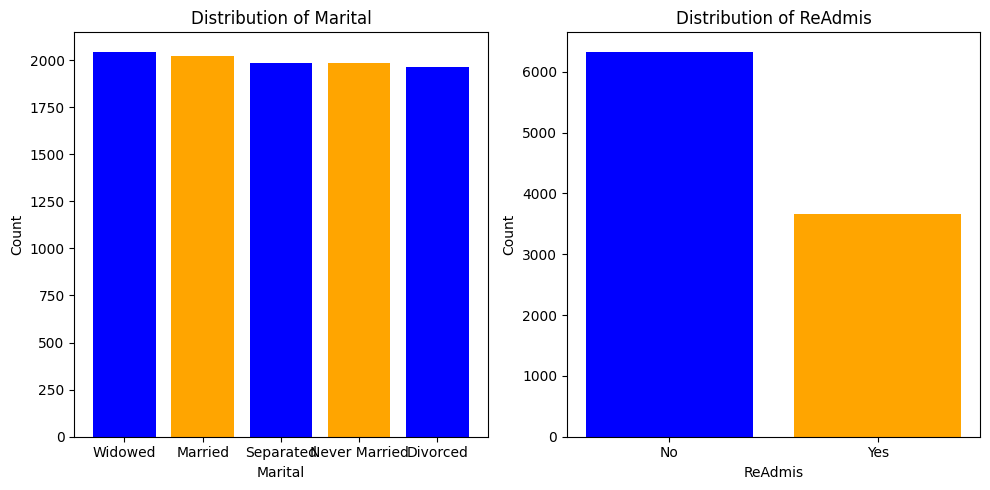

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis objects
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# HighBlood
axs[0].bar(highblood_stats.index, highblood_stats.values, color=['blue', 'orange'])
axs[0].set_title('Distribution of Marital')
axs[0].set_xlabel('Marital')
axs[0].set_ylabel('Count')

# ReAdmis
axs[1].bar(readmis_stats.index, readmis_stats.values, color=['blue', 'orange'])
axs[1].set_title('Distribution of ReAdmis')
axs[1].set_xlabel('ReAdmis')
axs[1].set_ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()


# **C3. Distribution (Bivariate):**

- **Divorced:** Out of 1961 divorced individuals, 678 (34.6%) were readmitted to the hospital, while 1283 (65.4%) were not.
- **Married:** Among 2023 married individuals, 755 (37.3%) experienced hospital readmission, while 1268 (62.7%) did not.
- **Never Married:** Of the 1984 individuals who were never married, 741 (37.3%) were readmitted, while 1243 (62.7%) were not.
- **Separated:** For the 1987 separated individuals, 728 (36.6%) experienced hospital readmission, while 1259 (63.4%) did not.
- **Widowed:** Among 2045 widowed individuals, 767 (37.5%) were readmitted to the hospital, while 1278 (62.5%) were not.


In [ ]:
# Bivariate Statistics for Categorical-Categorical Relationship
cross_tab = pd.crosstab(relevant_data['Marital'], relevant_data['ReAdmis'])
print("\nCross-tabulation between Marital and ReAdmis:")
print(cross_tab)


Cross-tabulation between Marital and ReAdmis:
ReAdmis          No  Yes
Marital                 
Divorced       1283  678
Married        1268  755
Never Married  1243  741
Separated      1259  728
Widowed        1278  767


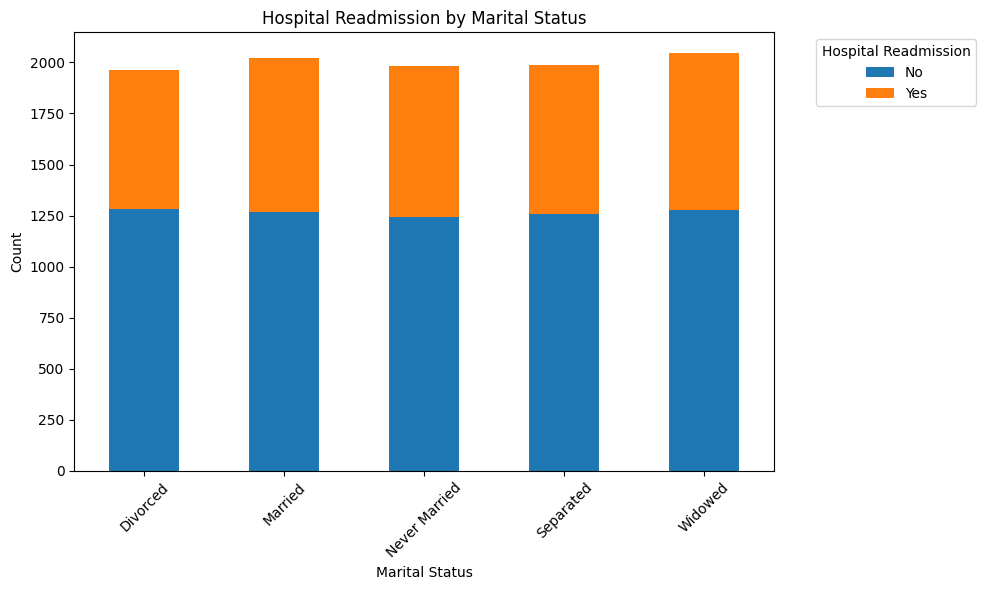

In [ ]:
# Plotting the cross-tabulation
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Hospital Readmission by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Hospital Readmission', bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()


# C4.

Data transformation goals:

1. Encoding Categorical Variables: Convert categorical variables into a format suitable for analysis, particularly for logistic regression.

Steps used to transform the data:

1. One-Hot Encoding: Convert categorical variables such as 'Marital' and 'ReAdmis' into binary numeric format using one-hot encoding.

In [ ]:
# Create a new DataFrame with just the 'ReAdmis' column as binary
readmis_binary = data['ReAdmis'].map({'No': 0, 'Yes': 1})
prepared_data = pd.concat([readmis_binary, pd.get_dummies(data['Marital'], prefix='Marital', drop_first=False)], axis=1)

# Drop the 'Marital_Separated' column
prepared_data.drop('Marital_Separated', axis=1, inplace=True)

# Rename the ReAdmis column to ReAdmis_Binary
prepared_data.rename(columns={'ReAdmis': 'ReAdmis_Binary'}, inplace=True)

# Display the new DataFrame
print(prepared_data.head())

   ReAdmis_Binary  Marital_Divorced  Marital_Married  Marital_Never Married  \
0               0                 1                0                      0   
1               0                 0                1                      0   
2               0                 0                0                      0   
3               0                 0                1                      0   
4               0                 0                0                      0   

   Marital_Widowed  
0                0  
1                0  
2                1  
3                0  
4                1  


# **C5.**

In [ ]:
# Save the prepared data to a CSV file
prepared_data.to_csv('/content/prepared_data.csv', index=False)

# Part IV: Model Comparison and Analysis

Logistic Regression initial model:

- The intercept (const) coefficient is -0.5478 with a standard error of 0.047 and a significant z-score of -11.765 (p < 0.001), suggesting a significant effect on the odds of readmission.

- The coefficients for marital status categories (Marital_Divorced, Marital_Married, Marital_Never Married, Marital_Widowed) do not show significant effects on the odds of readmission, as indicated by their high p-values (greater than 0.05).

Overall, the model did not find a significant relationship between marital status and the likelihood of hospital readmission.

In [ ]:
import statsmodels.api as sm

# Define independent and dependent variables
X = prepared_data[['Marital_Divorced', 'Marital_Married', 'Marital_Never Married', 'Marital_Widowed']]
y = prepared_data['ReAdmis_Binary']

# Add constant term to the independent variables
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit(maxiter=100)

# Print summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.657029
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         ReAdmis_Binary   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:               0.0003890
Time:                        20:07:15   Log-Likelihood:                -6570.3
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.2758
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5478      0.047    -11.765      0.000      -0.639      -0.

# **D2.**
RFE (Recursive Feature Elimination) is a machine learning technique that ranks and eliminates features one by one, identifying the most important ones based on their ranking.

RFE chose 'Marital_Divorced' as the key predictor for hospital readmission. RFE is robust, evaluating feature importance iteratively. Logistic regression fits binary tasks like readmission prediction. 'Marital_Divorced' was chosen for its high rank, ensuring vital data for the research.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
logreg = LogisticRegression()

# Define RFE with the logistic regression model
rfe = RFE(logreg, n_features_to_select=1)

# Fit RFE to the data
rfe.fit(X, y)

# Print the ranking of each feature
print("Feature Ranking:")
for i in range(len(X.columns)):
    print(f"Feature {i+1}: {X.columns[i]} - Rank: {rfe.ranking_[i]}")

# Select the features with the highest ranking
selected_features = X.columns[rfe.support_]
print("\nSelected Features:", selected_features)


Feature Ranking:
Feature 1: const - Rank: 5
Feature 2: Marital_Divorced - Rank: 1
Feature 3: Marital_Married - Rank: 4
Feature 4: Marital_Never Married - Rank: 3
Feature 5: Marital_Widowed - Rank: 2

Selected Features: Index(['Marital_Divorced'], dtype='object')


# **D3.**

- Reduced model with one predictor, Marital_Divorced
- Higher pseudo R-squared of 0.0003599 than the initial model
- Significant p-value (0.030) for Marital_Divorced
- Improved explanatory power and statistical significance compared to the initial model

In [ ]:
import statsmodels.api as sm

# Define independent variable
X_reduced = prepared_data[['Marital_Divorced']]

# Add constant term
X_reduced = sm.add_constant(X_reduced)

# Define dependent variable
y_reduced = prepared_data['ReAdmis_Binary']

# Fit logistic regression model
logit_model_reduced = sm.Logit(y_reduced, X_reduced)
result_reduced = logit_model_reduced.fit()

# Print summary of the reduced model
print(result_reduced.summary())

Optimization terminated successfully.
         Current function value: 0.657049
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         ReAdmis_Binary   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:               0.0003599
Time:                        20:07:15   Log-Likelihood:                -6570.5
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                   0.02961
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5234      0.023    -22.682      0.000      -0.569      -0.478
Marital_Div

# **E1.**

**Model Evaluation Metric to compare both models is the following:**

* The pseudo R-squared is a measure of how well the independent variables explain the variance in the dependent variable in a regression model. It ranges from 0 to 1, with higher values indicating a better fit

**Results:**
* The pseudo R-squared values show that reducing the features didn't notably affect the model's explanatory power. The model with just Marital_Divorced performs like the original model with all marital status variables.

In [ ]:
# Define independent and dependent variables for the initial model
X_initial = prepared_data[['Marital_Divorced', 'Marital_Married', 'Marital_Never Married']]
X_initial = sm.add_constant(X_initial)
y_initial = prepared_data['ReAdmis_Binary']

# Fit the initial logistic regression model
logit_model_initial = sm.Logit(y_initial, X_initial)
result_initial = logit_model_initial.fit(maxiter=100)

# Define independent and dependent variables for the reduced model
X_reduced = prepared_data[['Marital_Divorced']]
X_reduced = sm.add_constant(X_reduced)
y_reduced = prepared_data['ReAdmis_Binary']

# Fit the reduced logistic regression model
logit_model_reduced = sm.Logit(y_reduced, X_reduced)
result_reduced = logit_model_reduced.fit()

# Calculate pseudo R-squared values
pseudo_r_squared_initial = result_initial.prsquared
pseudo_r_squared_reduced = result_reduced.prsquared

# Print the pseudo R-squared values
print("Pseudo R-squared for Initial Model:", pseudo_r_squared_initial)
print("Pseudo R-squared for Reduced Model:", pseudo_r_squared_reduced)


Optimization terminated successfully.
         Current function value: 0.657046
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.657049
         Iterations 4
Pseudo R-squared for Initial Model: 0.0003642550367467523
Pseudo R-squared for Reduced Model: 0.00035993131190947825


# **E2.**

The confusion matrix helps evaluate the performance of a classification model, and accuracy measures how often the model makes correct predictions.

**Results:**

The confusion matrix for the reduced logistic regression model indicates the following:

- True Positives (TP): 0 (correctly predicted positive cases)
- False Positives (FP): 0 (incorrectly predicted positive cases)
- True Negatives (TN): 6331 (correctly predicted negative cases)
- False Negatives (FN): 3669 (incorrectly predicted negative cases)

The accuracy of the reduced model is approximately 63.31%, which means it correctly predicts the outcome around 63.31% of the time.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Define the predictions for the reduced model
y_pred_reduced = result_reduced.predict(X_reduced)
y_pred_binary_reduced = (y_pred_reduced > 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix_reduced = confusion_matrix(y_reduced, y_pred_binary_reduced)

# Calculate the accuracy
accuracy_reduced = accuracy_score(y_reduced, y_pred_binary_reduced)

# Print the confusion matrix and accuracy
print("Confusion Matrix for Reduced Model:")
print(conf_matrix_reduced)
print("\nAccuracy for Reduced Model:", accuracy_reduced)


Confusion Matrix for Reduced Model:
[[6331    0]
 [3669    0]]

Accuracy for Reduced Model: 0.6331


# **E3.** The Python file is available in the submission.

# Part V: Data Summary and Implications

# **F1.**


The findings of the data analysis are summarized below:

1. **Regression Equation for Reduced Model**:
   - The reduced logistic regression equation is: ReAdmis_Binary = −0.5234−0.1144×Marital_Divorced

   A formula used in a logistic regression model to predict the probability of hospital readmission (ReAdmis_Binary) based on whether a patient is divorced (Marital_Divorced). The coefficients in the equation (-0.5234 for the constant term and -0.1144 for Marital_Divorced) are used to calculate this probability.

2. **Interpretation of Coefficients**:
   - The coefficient for 'Marital_Divorced' (-0.1144) indicates a decrease in the likelihood of hospital readmission for divorced individuals.

3. **Statistical and Practical Significance**:
   - The reduced model's coefficient for 'Marital_Divorced' is statistically significant (p-value = 0.030), showing an impact on readmission.
   - However, the model's overall explanatory power (pseudo R-squared = 0.0003599) is very low, suggesting limited practical significance.

4. **Limitations**:
   - The model overlooks other potential influential factors, leading to oversimplified predictions.
   - It may not capture the complete picture of hospital readmission due to its low explanatory power.




---



# **F2.**

Based on the results, here are the recommendations:

1. **Include More Variables**:
   - Incorporate additional relevant variables to capture a more comprehensive picture of hospital readmission factors.

2. **Assess Model Performance**:
   - Evaluate model performance using metrics beyond statistical significance, such as sensitivity and specificity.

3. **Explore Interactions**:
   - Investigate potential interactions between variables to uncover nuanced relationships affecting readmission rates.

4. **Consider Advanced Techniques**:
   - Explore advanced modeling techniques like machine learning algorithms to handle complex relationships and improve prediction accuracy.

# **H.**  N/A

### **I.** Brownlee, J. (2023, April 22). "RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains." Retrieved from https://machinelearningmastery.com/rfe-feature-selection-in-python/